In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
import seaborn as sns

In [2]:
data = pd.read_csv("EEG_data.csv")
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [3]:
demo_data = pd.read_csv('demographic_info.csv')
demo_data.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [4]:
demo_data = demo_data.rename(columns = {'subject ID': 'SubjectID'})
data = data.merge(demo_data,how = 'inner',on = 'SubjectID')
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


In [5]:
data = pd.get_dummies(data)

Text(0.5, 1.0, 'Correlation Heatmap')

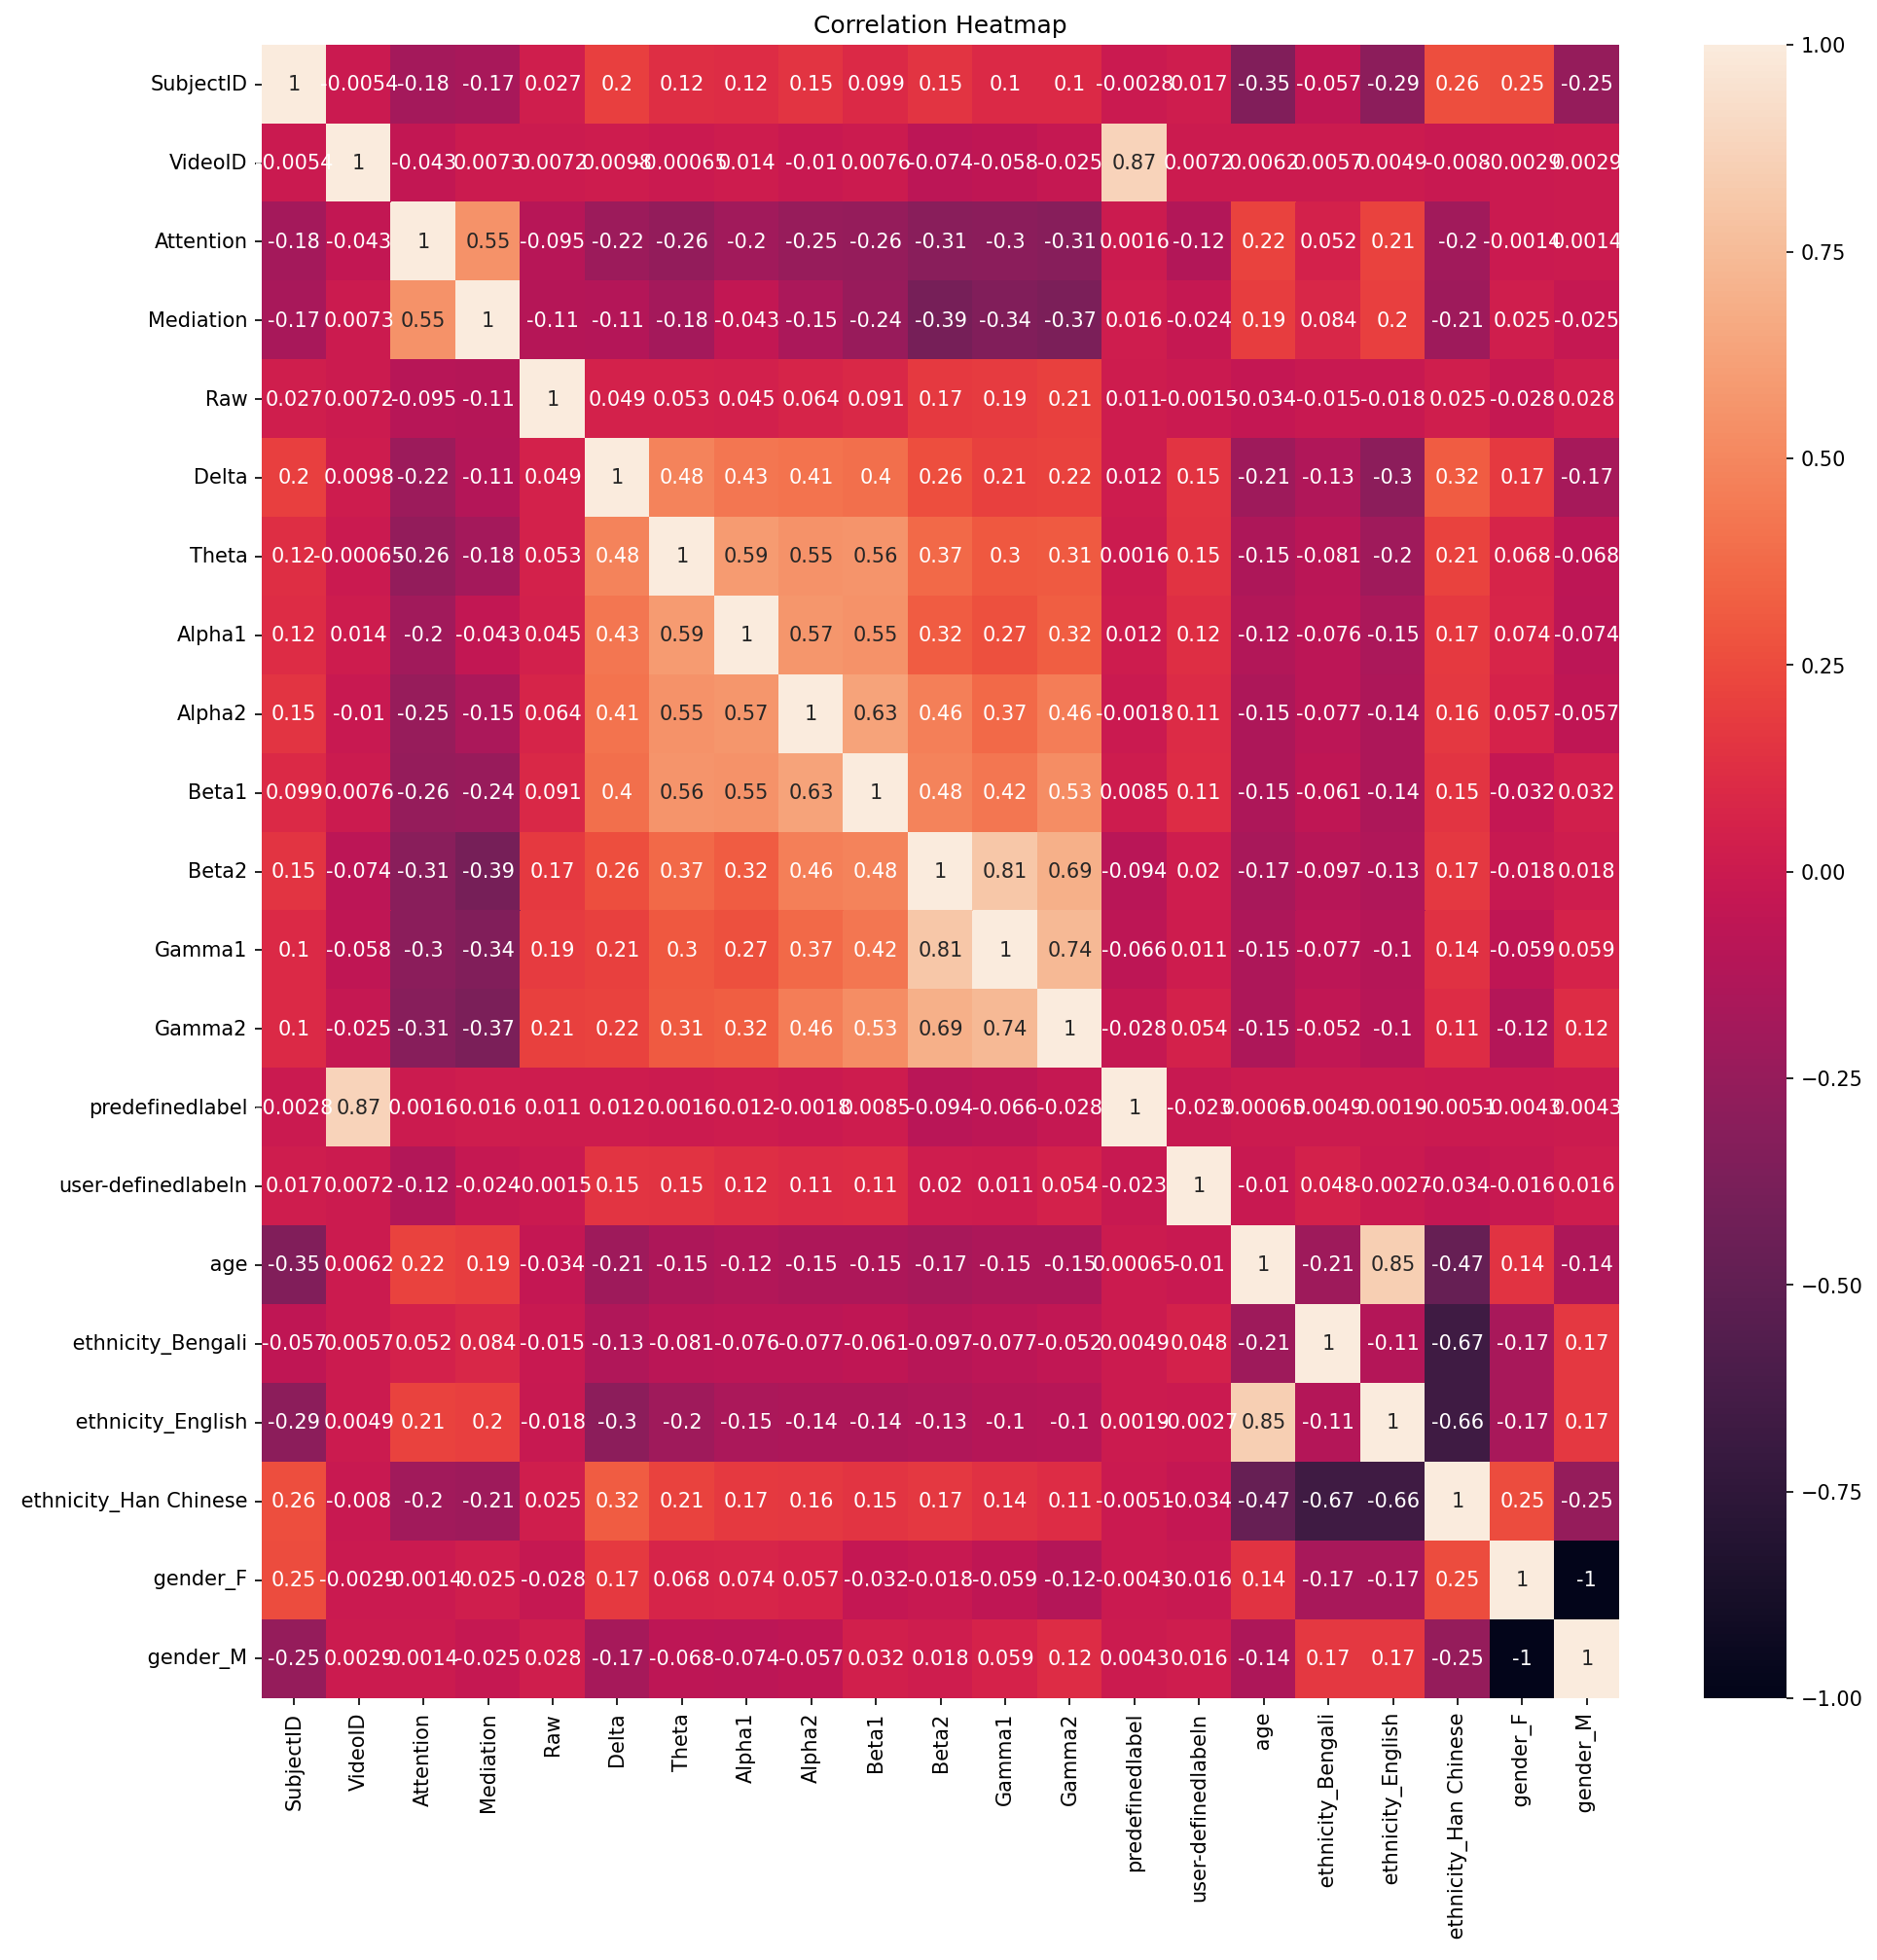

In [6]:
plt.figure(figsize=(15, 15),dpi=150)
heatmap = sns.heatmap(data.corr(), vmin= -1, vmax = 1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [7]:
data.drop(columns = ['SubjectID','VideoID','predefinedlabel'],inplace=True)

In [8]:
y= data.pop('user-definedlabeln')
x= data

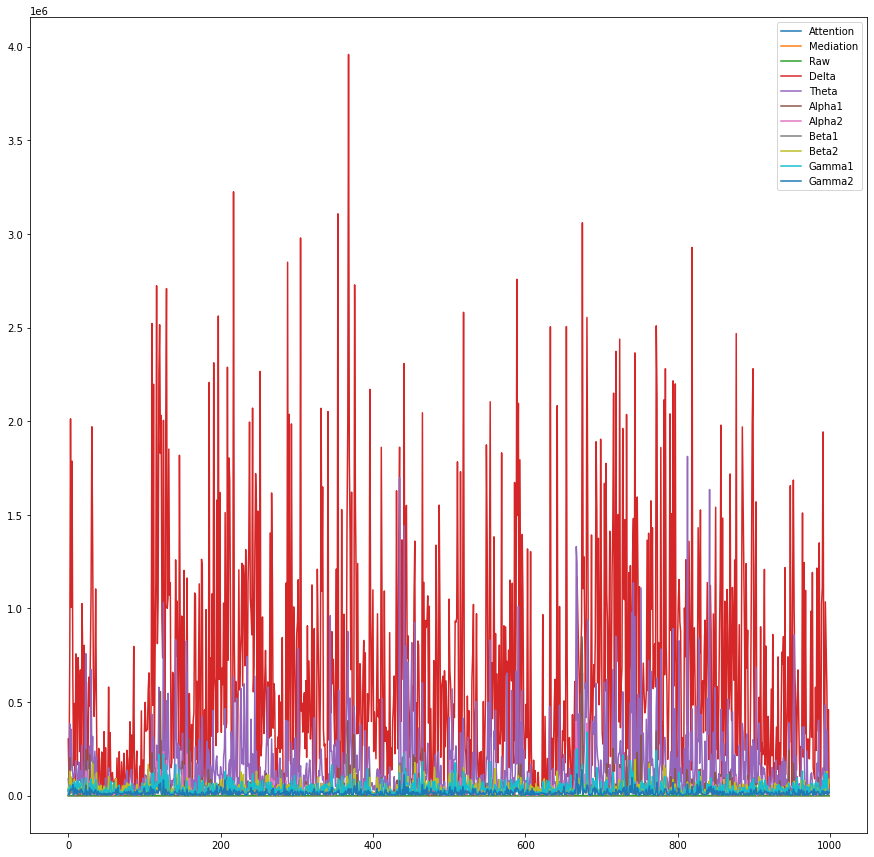

In [9]:
x.iloc[:1000,:11].plot(figsize = (15,15))

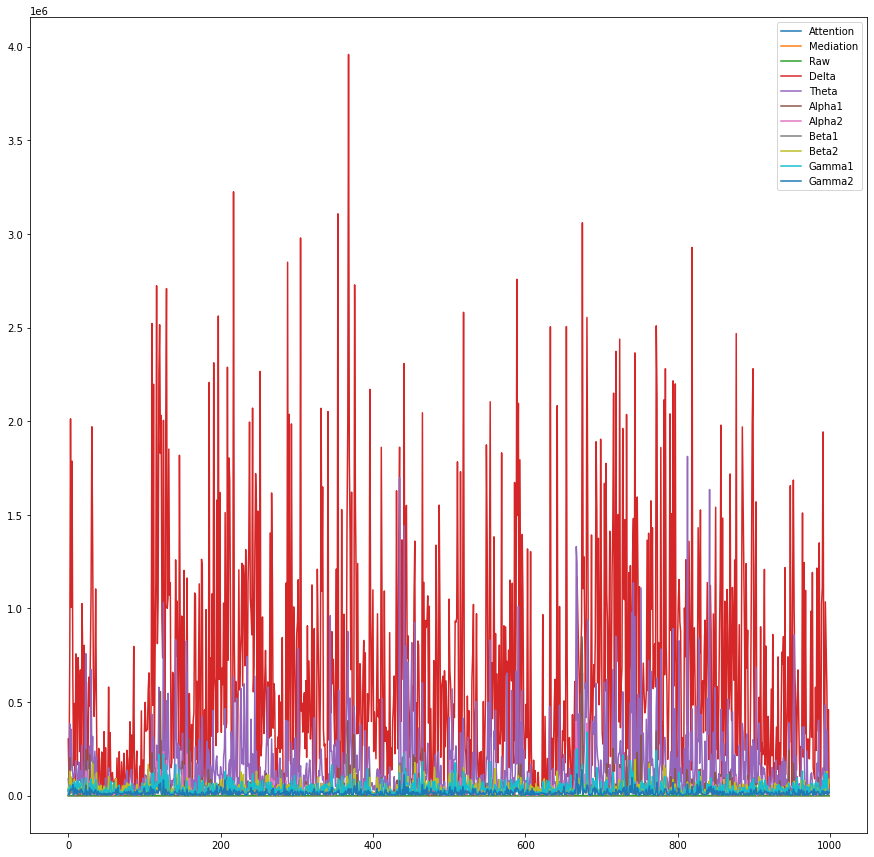

In [10]:
pd.DataFrame(x).iloc[:1000,:11].plot(figsize = (15,15))

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

In [12]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((10889, 17), (1922, 17), (10889,), (1922,))

In [13]:
x_train = np.array(x_train).reshape(-1,17,1)
x_test = np.array(x_test).reshape(-1,17,1)

In [14]:
inputs = tf.keras.Input(shape=(17,1))

Dense1 = Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

Dense2 = Dense(128, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense1)
Dense3 = Dense(256, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(Dense2)

lstm_1=  Bidirectional(LSTM(256, return_sequences = True))(Dense1)
drop = Dropout(0.3)(lstm_1)
lstm_3=  Bidirectional(LSTM(128, return_sequences = True))(drop)
drop2 = Dropout(0.3)(lstm_3)

flat = Flatten()(drop2)

Dense_1 = Dense(256, activation = 'relu')(flat)

Dense_2 = Dense(128, activation = 'relu')(flat)
outputs = Dense(1, activation='sigmoid')(Dense_2)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17, 1)]           0         
                                                                 
 dense (Dense)               (None, 17, 64)            128       
                                                                 
 bidirectional (Bidirectiona  (None, 17, 512)          657408    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 17, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 17, 256)          656384    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 17, 256)           0     

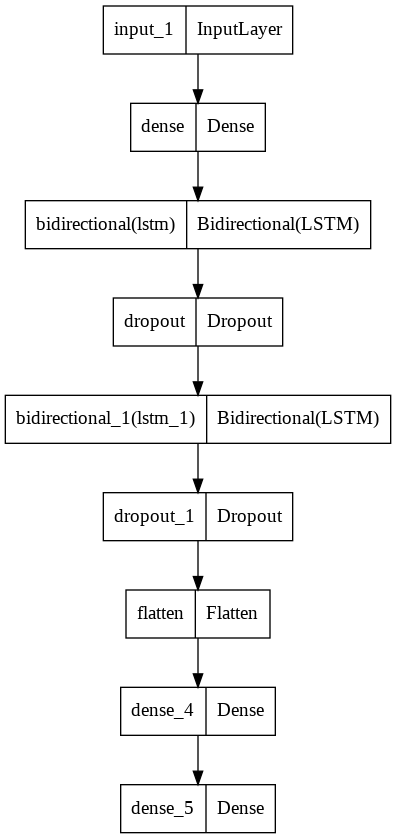

In [15]:
tf.keras.utils.plot_model(model)

In [16]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])        
        return model,history

In [17]:
model,history = train_model(model, x_train, y_train,x_test, y_test, save_to= './', epoch = 10) 

Epoch 1/10
545/545 [==============================] - ETA: 0s - loss: 0.7072 - accuracy: 0.5456
Epoch 1: val_accuracy improved from -inf to 0.57596, saving model to ./_best_model.h5
545/545 [==============================] - 131s 209ms/step - loss: 0.7072 - accuracy: 0.5456 - val_loss: 0.6898 - val_accuracy: 0.5760 - lr: 0.0010
Epoch 2/10
545/545 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5754
Epoch 2: val_accuracy improved from 0.57596 to 0.58065, saving model to ./_best_model.h5
545/545 [==============================] - 110s 201ms/step - loss: 0.6890 - accuracy: 0.5754 - val_loss: 0.6867 - val_accuracy: 0.5806 - lr: 9.0484e-04
Epoch 3/10
545/545 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.5758
Epoch 3: val_accuracy did not improve from 0.58065
545/545 [==============================] - 108s 199ms/step - loss: 0.6848 - accuracy: 0.5758 - val_loss: 0.6845 - val_accuracy: 0.5734 - lr: 8.1873e-04
Epoch 4/10
545/545 [==============

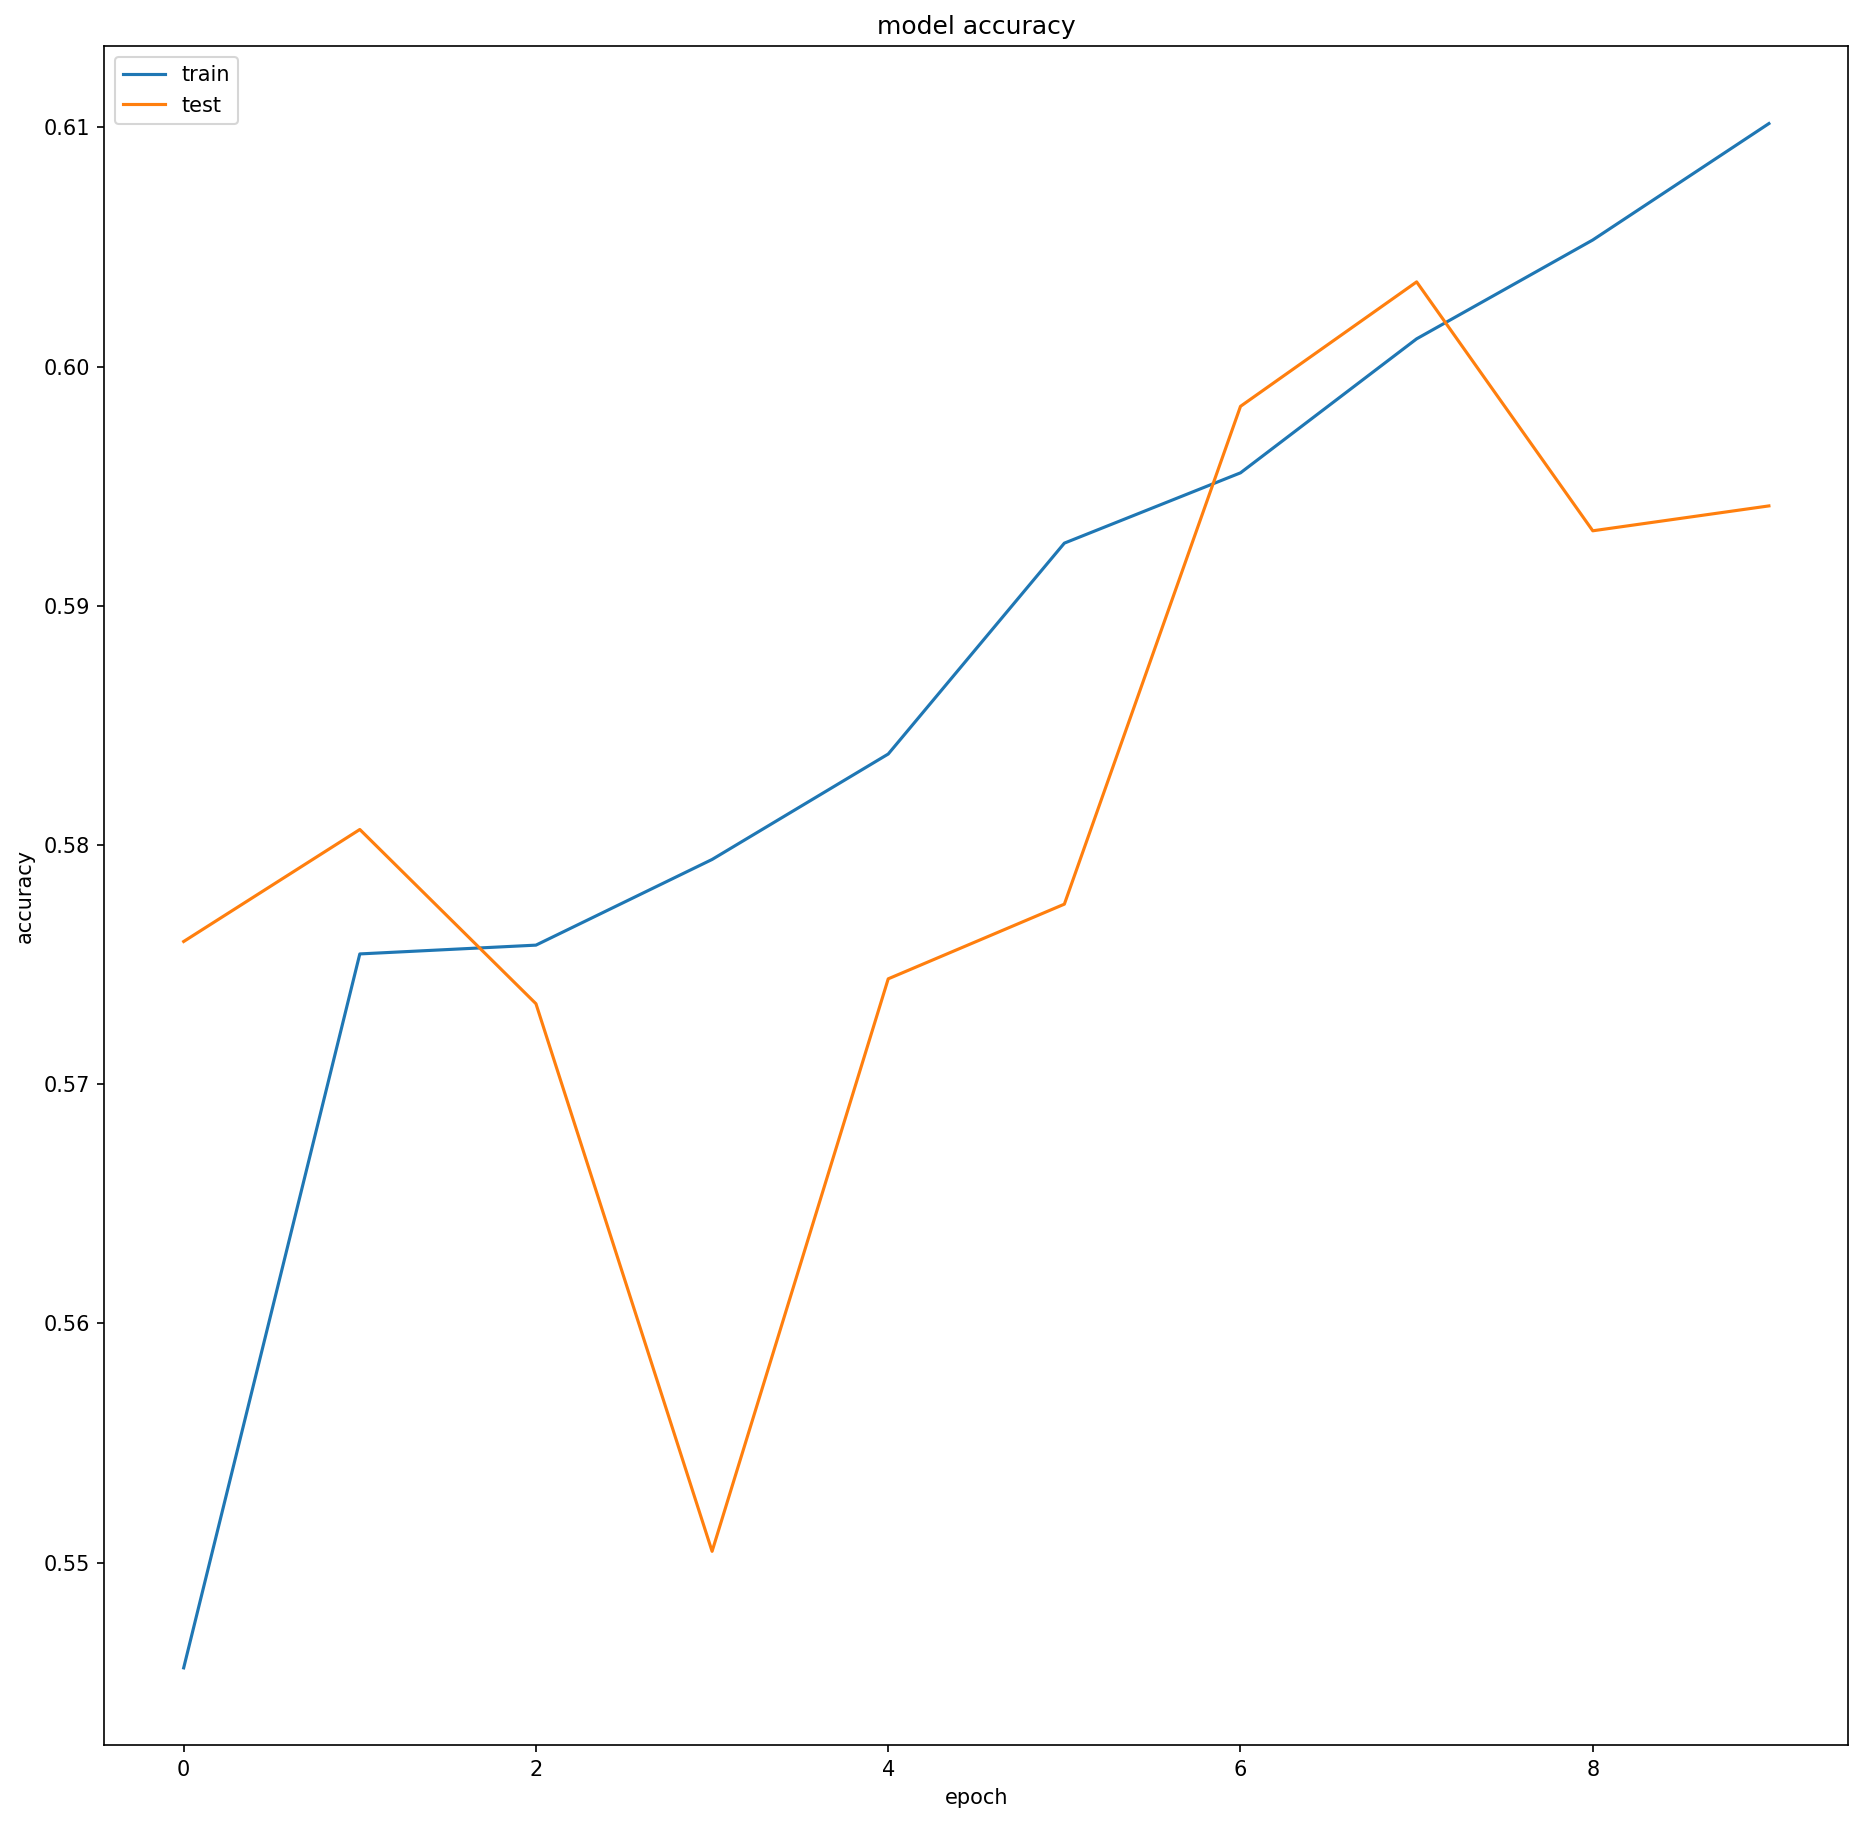

In [18]:
plt.figure(figsize=(15, 15),dpi=150)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

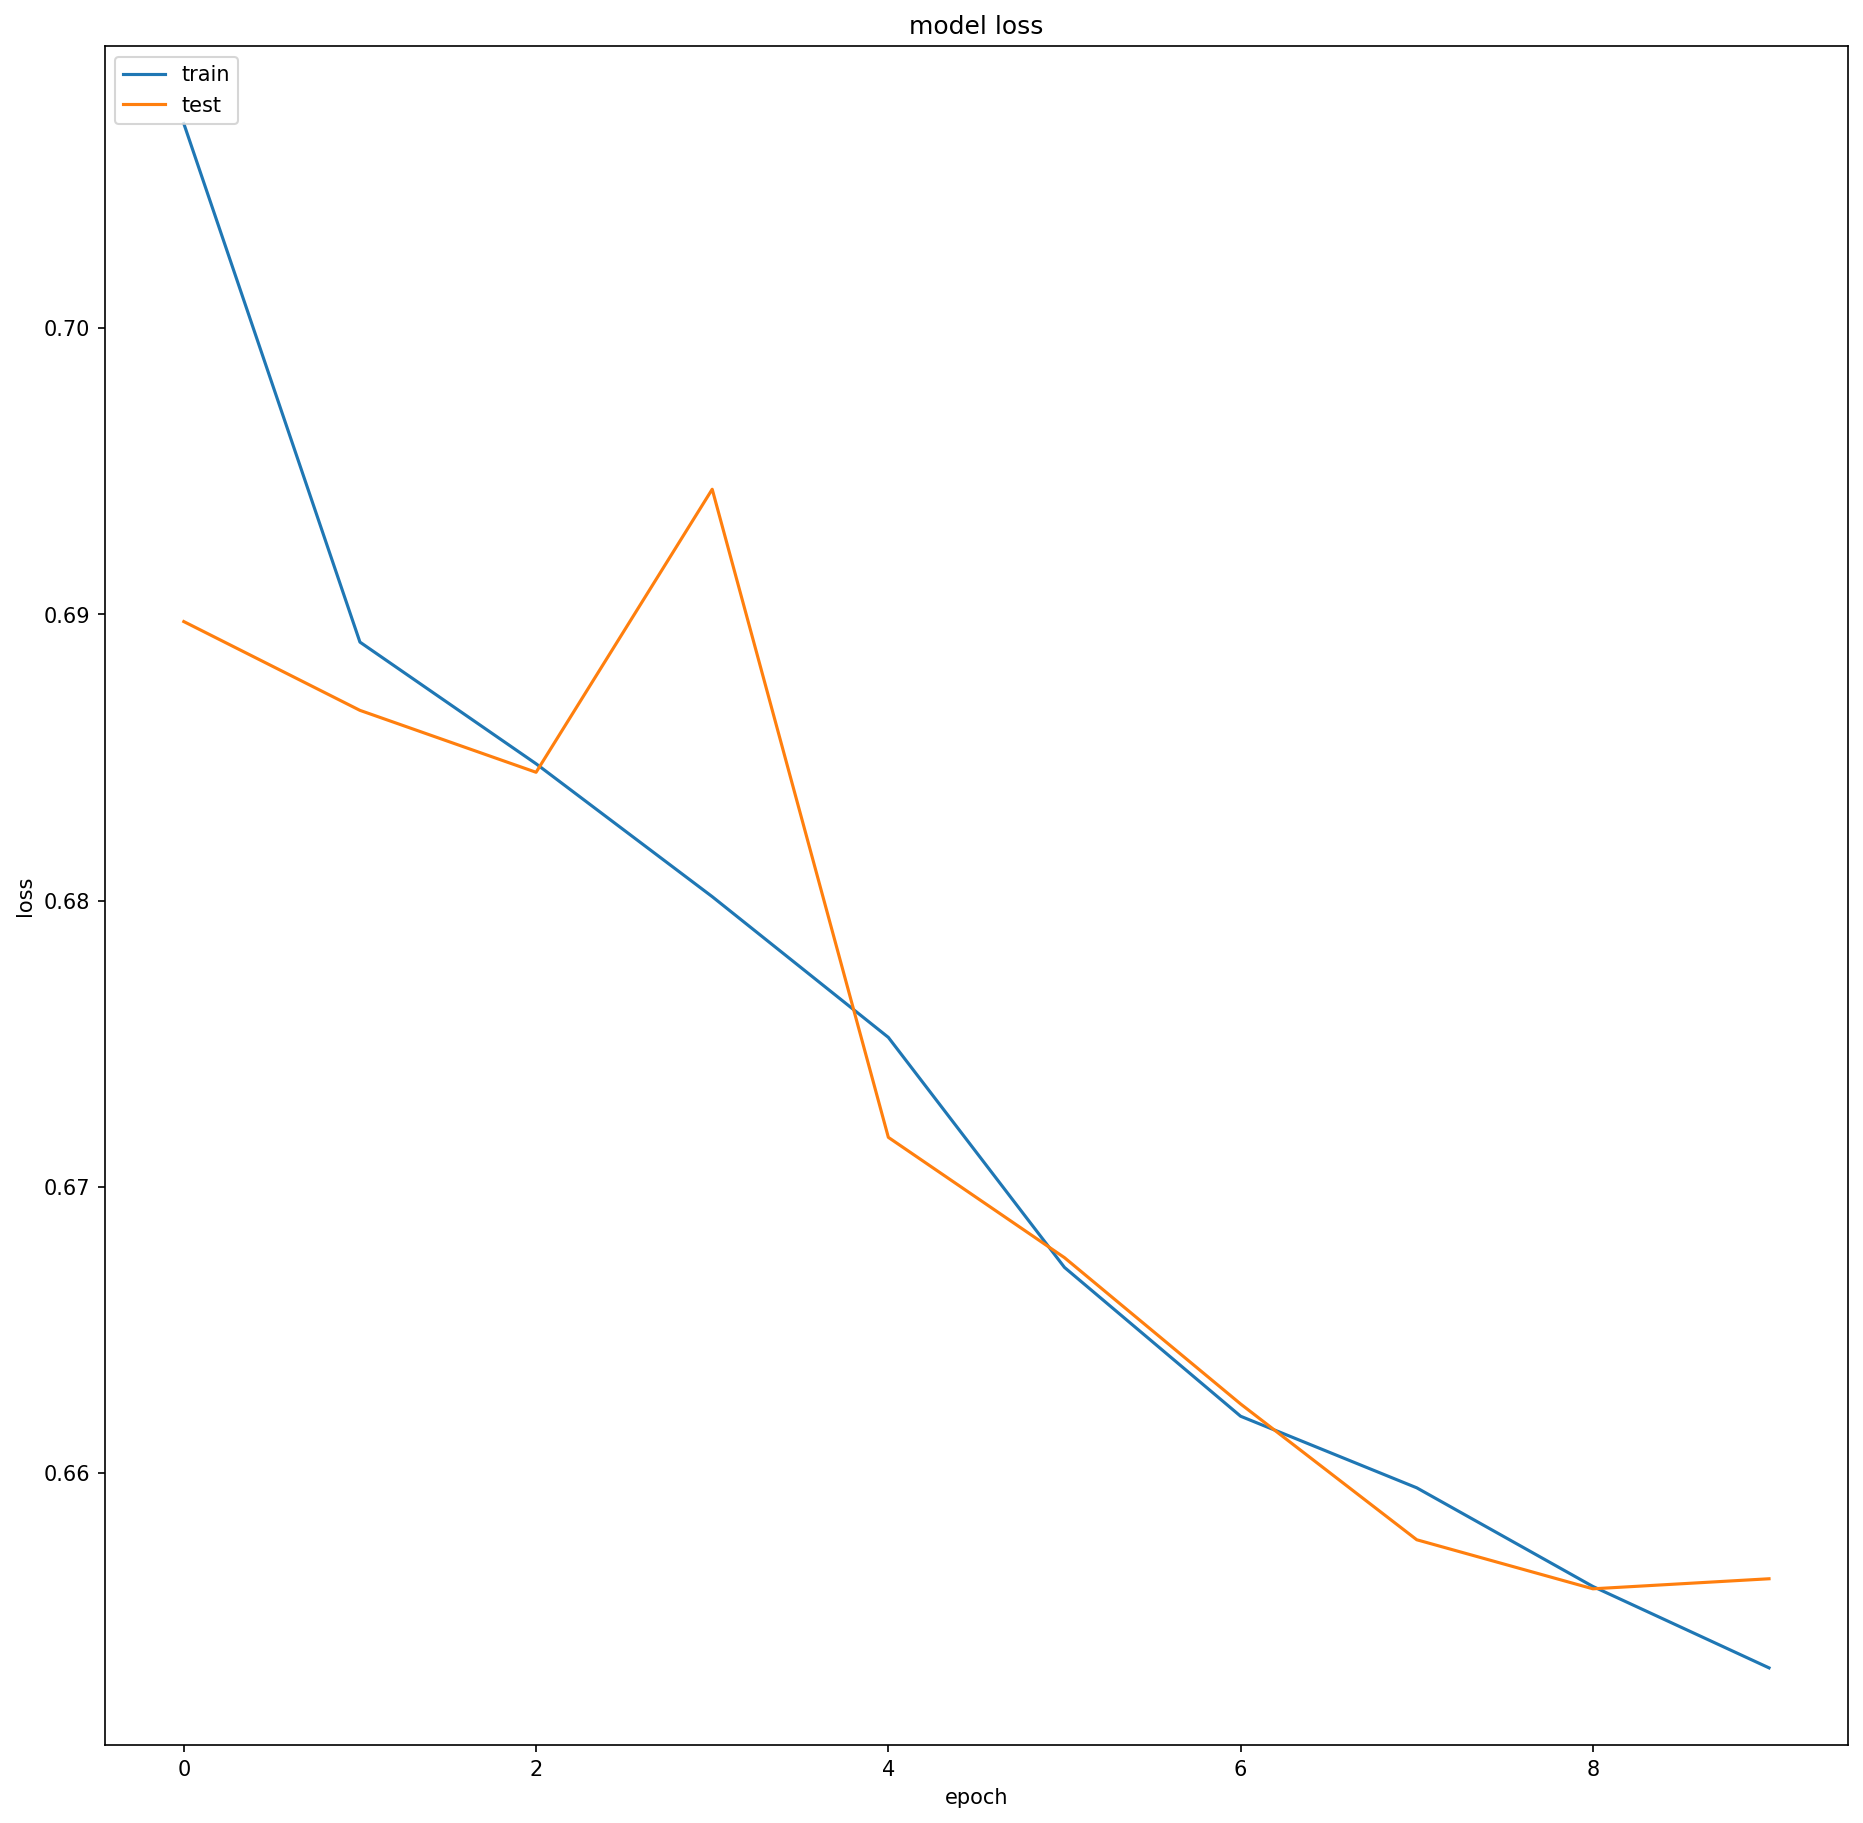

In [19]:
plt.figure(figsize=(15, 15),dpi=150)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
y_pred =model.predict(x_test)
y_pred = np.array(y_pred >= 0.5, dtype = np.int64)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.62      0.51      0.56       968
         1.0       0.58      0.68      0.62       954

    accuracy                           0.59      1922
   macro avg       0.60      0.59      0.59      1922
weighted avg       0.60      0.59      0.59      1922



In [22]:
print(confusion_matrix(y_test, y_pred))

[[498 470]
 [310 644]]


In [23]:
print(accuracy_score(y_test,y_pred))

0.5941727367325702
